# import library

In [1]:
from pyefriend import load_api

# api 로드(High-level)

- market: 국내 'domestic' / 해외 'overseas'
- account: 사용할 계좌
- password: 사용할 계좌 입력 비밀번호

In [2]:
api = load_api(market='overseas', account='5005775101', password='Dmazhffk1!!')

[INFO]2021-11-29 19:25:57 - pyefriend/controller.py/run_app, 22: Start APP


In [3]:
from pyefriend.const import *

In [4]:
from datetime import datetime

In [5]:
today = datetime.today().strftime('%Y%m%d')

In [6]:
today

'20211129'

In [7]:
start_date = '20210101'

In [12]:
columns = [
    dict(index=0, key='order_date', not_null=True),
    dict(index=2, key='order_num', not_null=True),
    dict(index=3, key='origin_order_num'),
    dict(index=12, key='product_code'),
    dict(index=4, key='order_type'),
    dict(index=5, key='order_type_name'),
    dict(index=10, key='count'),
    dict(index=13, key='price'),
    dict(index=12, key='executed_count'),
    dict(index=14, key='executed_amount'),
    dict(index=16, key='is_cancel'),
]

(
    api.set_account_info()
        .set_data(4, start_date)
        .set_data(5, today)
        .set_data(6, '00')  # 매도매수구분코드  전체: 00 / 매도: 01 / 매수: 02
        .set_data(7, '01')  # 체결구분        전체: 00 / 체결: 01 / 미체결: 02
        .set_data(8, 'NASD')
        .request_data(Service.OS_US_CCLD)
        .get_data(multiple=True, columns=columns)
)

[]

In [5]:
KRX,삼성전자,005930,517051.0519
KRX,SK하이닉스,000660,94593.56352
KRX,LG화학,051910,56583.88224
KRX,NAVER,035420,55606.95563
KRX,삼성SDI,006400,43058.37412
KRX,현대차,005380,42013.34784
KRX,셀트리온,068270,40291.55007

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (Temp/ipykernel_23540/4191551413.py, line 1)

In [4]:
start_date = '0020211101'
end_date = '20211126'

In [5]:
product_code = 'AAPL'

In [31]:
(
    api
        .set_data(0, 'N')
        .set_data(1, 'MSFT')  # 1: 종목코드
        .request_data(Service.KST03010100)
)

print(api.get_data(6), float(api.get_data(27)))

마이크로소프트 0.0


In [168]:
(
    api
        .set_data(0, 'N', 0)
        .set_data(1, product_code, 0)  # 1: 종목코드
        .set_data(0, 'N', 1)
        .set_data(1, product_code, 1)
        .set_data(2, start_date, 1)
        .set_data(3, end_date, 1)
        .set_data(4, 'D', 1)
        .request_data(Service.KST03010100)
)

columns = [
    dict(index=0, key='standard_date', not_null=True),
    dict(index=4, key='minimum', dtype=float),
    dict(index=3, key='maximum', dtype=float),
    dict(index=2, key='opening', dtype=float),
    dict(index=1, key='closing', dtype=float, not_null=True),
    dict(index=5, key='volume', dtype=int),
]
# columns = [dict(index=i, key=f'{i}') for i in range(16)]
data = api.get_data(multiple=True, columns=columns, block_index=1)
# data = [e for e in data if e['closing'] != 0]

In [169]:
data

[{'standard_date': '20211124',
  'minimum': 159.0,
  'maximum': 162.0,
  'opening': 160.0,
  'closing': 161.0,
  'volume': 67221077},
 {'standard_date': '20211123',
  'minimum': 159.0,
  'maximum': 161.0,
  'opening': 161.0,
  'closing': 161.0,
  'volume': 95834326},
 {'standard_date': '20211122',
  'minimum': 161.0,
  'maximum': 165.0,
  'opening': 161.0,
  'closing': 161.0,
  'volume': 117178494},
 {'standard_date': '20211119',
  'minimum': 156.0,
  'maximum': 161.0,
  'opening': 157.0,
  'closing': 160.0,
  'volume': 116881519},
 {'standard_date': '20211118',
  'minimum': 153.0,
  'maximum': 158.0,
  'opening': 153.0,
  'closing': 157.0,
  'volume': 137341482},
 {'standard_date': '20211117',
  'minimum': 150.0,
  'maximum': 155.0,
  'opening': 150.0,
  'closing': 153.0,
  'volume': 88448412},
 {'standard_date': '20211116',
  'minimum': 149.0,
  'maximum': 151.0,
  'opening': 149.0,
  'closing': 151.0,
  'volume': 59047419},
 {'standard_date': '20211115',
  'minimum': 149.0,
  'maxim

In [184]:
standard = '0'
columns = [
    dict(index=0, key='standard_date', not_null=True),
    dict(index=7, key='minimum', dtype=float),
    dict(index=6, key='maximum', dtype=float),
    dict(index=5, key='opening', dtype=float),
    dict(index=1, key='closing', dtype=float),
    dict(index=8, key='volume', dtype=int),
]

data = (
    api.set_auth(0)  # 권한 확인
        .set_data(1, MarketCode.as_short('NASD'))
        .set_data(2, product_code)  # 1: 종목코드
        .set_data(3, standard)
        .set_data(4, '20210706')
        .request_data(Service.OS_ST03)
        .get_data(multiple=True, columns=columns, block_index=1)
)
print(len(data))
data

100


[{'standard_date': '20210706',
  'minimum': 139.6567,
  'maximum': 142.7276,
  'opening': 139.6567,
  'closing': 141.6009,
  'volume': 108181793},
 {'standard_date': '20210702',
  'minimum': 137.3385,
  'maximum': 139.5869,
  'opening': 137.4931,
  'closing': 139.547,
  'volume': 78945572},
 {'standard_date': '20210701',
  'minimum': 135.3594,
  'maximum': 136.9248,
  'opening': 136.1969,
  'closing': 136.8649,
  'volume': 52485781},
 {'standard_date': '20210630',
  'minimum': 135.4691,
  'maximum': 137.0045,
  'opening': 135.7682,
  'closing': 136.5559,
  'volume': 63261393},
 {'standard_date': '20210629',
  'minimum': 133.9536,
  'maximum': 136.0872,
  'opening': 134.4022,
  'closing': 135.9277,
  'volume': 64556081},
 {'standard_date': '20210628',
  'minimum': 132.9565,
  'maximum': 134.8459,
  'opening': 133.0163,
  'closing': 134.3823,
  'volume': 62111303},
 {'standard_date': '20210625',
  'minimum': 132.4181,
  'maximum': 133.4949,
  'opening': 133.0662,
  'closing': 132.7172,
 

In [170]:
(
    api
        .set_data(0, 'Q')
        .set_data(1, '11302')
#             .set_data(1, '20443')
#         .set_data(1, '91002')
        .set_data(2, '1')
        .set_data(3, '0')
        .set_data(4, '0000')
        .request_data(Service.KST13020000)
)

columns = [
    dict(index=0, key='product_code', not_null=True),
    dict(index=1, key='product_status', not_null=True),
    dict(index=2, key='product_name'),
    dict(index=3, key='current', dtype=int),
    dict(index=4, key='compared_yesterday_amount', dtype=int),
    dict(index=5, key='compared_yesterday_sign', dtype=str),
    dict(index=7, key='total_volume', dtype=int),
    dict(index=8, key='total_amount', dtype=int),
    dict(index=13, key='continuous_maximum_days', dtype=int),
    dict(index=14, key='continuous_minimum_days', dtype=int),
    dict(index=15, key='continuous_increase_days', dtype=int),
    dict(index=16, key='continuous_decrease_days', dtype=int),
    dict(index=17, key='continuous_nochange_days', dtype=int),
]
data = api.get_data(multiple=True, columns=columns)
data

[]

In [167]:
(
    api
        .set_data(0, '096530')
        .request_data('PST01560000')
)

columns = [dict(index=i, key=f'{i}') for i in range(16)]
data = api.get_data(multiple=True, columns=columns)
data

[]

In [102]:
data

[]

In [13]:
columns = [dict(index=i, key=f'{i}') for i in range(16)]
data = api.get_data(multiple=True, columns=columns)
# df = pd.DataFrame(data[:50])
print(data)

[{'0': '0.', '1': '2', '2': '0.33', '3': '161.', '4': '67221077', '5': ' 0', '6': '애플', '7': '161.', '8': 'AAPL', '9': ' 0', '10': ' 0', '11': ' 0', '12': '160.', '13': '162.', '14': '159.', '15': ' 0'}]


In [6]:
import pandas as pd

In [7]:
product_code = '051910'

In [99]:
# if market == Market.DOMESTIC:
#     market_code = 'J'
# elif market == Market.OVERSEAS:
#     market_code = 'N'

columns = [
    dict(index=0, key='standard_date', not_null=True),
    dict(index=3, key='minimum', dtype=int),
    dict(index=2, key='maximum', dtype=int),
    dict(index=1, key='opening', dtype=int),
    dict(index=4, key='closing', dtype=int),
    dict(index=5, key='volume', dtype=int),
]

(
    api.set_data(0, 'J')  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, product_code)  # 1: 종목코드
        .set_data(2, 'D')  # D: 일/ W: 주/ M: 월
        .request_data(Service.SCPD)
        .get_data(multiple=True, columns=columns)
)

[]

In [4]:
sector_code = '0013'
print(sector_code)
columns = [
            dict(index=0, key='standard_date', not_null=True),
            dict(index=1, key='current', dtype=float,not_null=True),
            dict(index=7, key='minimum', dtype=float),
            dict(index=6, key='maximum', dtype=float),
            dict(index=5, key='opening', dtype=float),
            dict(index=4, key='closing', dtype=float),
            dict(index=9, key='volume', dtype=int),
        ]

(
    api.set_data(0, 'U', 0)
        .set_data(1, sector_code, 0)
        .set_data(0, 'U', 1)  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, sector_code, 1)  # 1: 종목코드
        .set_data(2, '20211101', 1)
        .set_data(3, 'D', 1)  # D: 일/ W: 주/ M: 월
        .request_data('PUP02120000')
        .get_data(multiple=True, columns=columns, block_index=1)
)

0013


[{'standard_date': '20211101',
  'current': 27019.67,
  'minimum': 26936.51,
  'maximum': 27223.14,
  'opening': 27102.71,
  'closing': 0.29,
  'volume': 65886},
 {'standard_date': '20211029',
  'current': 26942.54,
  'minimum': 26913.64,
  'maximum': 27666.84,
  'opening': 27591.73,
  'closing': -1.66,
  'volume': 117893},
 {'standard_date': '20211028',
  'current': 27395.98,
  'minimum': 26959.53,
  'maximum': 27834.86,
  'opening': 26967.41,
  'closing': 1.21,
  'volume': 173909},
 {'standard_date': '20211027',
  'current': 27069.39,
  'minimum': 27013.44,
  'maximum': 27351.64,
  'opening': 27310.54,
  'closing': -1.11,
  'volume': 77772},
 {'standard_date': '20211026',
  'current': 27373.37,
  'minimum': 27116.95,
  'maximum': 27496.64,
  'opening': 27211.8,
  'closing': 1.47,
  'volume': 99264},
 {'standard_date': '20211025',
  'current': 26976.52,
  'minimum': 26648.22,
  'maximum': 27134.67,
  'opening': 26805.25,
  'closing': -0.04,
  'volume': 62355},
 {'standard_date': '2021

In [4]:
import numpy as np
import pandas as pd

In [9]:
from datetime import datetime
product_code = '005930'

In [1]:
# 분별차트
(
    api
    .set_data(0, 'J')
    .set_data(1, '005930')
    .set_data(2, '60')
    .request_data('KST13020000')
)

columns = [dict(index=i, key=f'{i}') for i in range(23)]
data = api.get_data(multiple=True, columns=columns)
display(pd.DataFrame(data))
len(data)

NameError: name 'api' is not defined

In [37]:
# 분별차트
(
    api
    .set_data(0, 'J')
    .set_data(1, '005930')
    .set_data(2, '60')
    .request_data('PST01012000')
)

columns = [dict(index=i, key=f'{i}') for i in range(23)]
data = api.get_data(multiple=True, columns=columns)
display(pd.DataFrame(data))
len(data)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,155926,70600,100,,,,,,,,...,,,,,,,,,,
1,155911,70600,58,,,,,,,,...,,,,,,,,,,
2,155854,70600,24,,,,,,,,...,,,,,,,,,,
3,155854,70600,10,,,,,,,,...,,,,,,,,,,
4,155841,70600,10,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,151600,70700,3,,,,,,,,...,,,,,,,,,,
996,151600,70700,1,,,,,,,,...,,,,,,,,,,
997,151600,70800,7,,,,,,,,...,,,,,,,,,,
998,151600,70800,2,,,,,,,,...,,,,,,,,,,


1000

In [15]:
# 상승 하락 종목 수
(
    api
    .set_auth(0)
    .set_data(1, 'NAS')
    .set_data(2, 'AAPL')
    .request_data('OS_ST02')
)

columns = [dict(index=i, key=f'{i}') for i in range(23)]
data = api.get_data(multiple=True, columns=columns, block_index=1)
print(data)
# display(pd.DataFrame(data))
len(data)

[{'0': '149.9900', '1': '150.0100', '2': '1933', '3': '1000', '4': '0', '5': '-2', '6': '149.9800', '7': '150.0200', '8': '0', '9': '0', '10': '0', '11': '0', '12': '149.9700', '13': '150.0300', '14': '0', '15': '0', '16': '0', '17': '0', '18': '149.9600', '19': '150.0400', '20': '0', '21': '0', '22': '0'}]


1

In [27]:
# 상승 하락 종목 수
(
    api
    .set_data(0, 'J')
    .set_data(1, '004170')
    .set_data(2, '4')
    .request_data('SCPC')
)

columns = [dict(index=i, key=f'{i}') for i in range(23)]
data = api.get_data(multiple=True, columns=columns)
display(pd.DataFrame(data))
len(data)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,154824,243000,3500,2,1,170.41,1.46,,,,...,,,,,,,,,,
1,154702,243000,3500,2,1,170.41,1.46,,,,...,,,,,,,,,,
2,154000,243000,3500,2,46,170.41,1.46,,,,...,,,,,,,,,,
3,153008,243000,3500,2,3018,170.41,1.46,,,,...,,,,,,,,,,
4,151959,242500,3000,2,1,170.41,1.25,,,,...,,,,,,,,,,
5,151958,242500,3000,2,1,170.41,1.25,,,,...,,,,,,,,,,
6,151957,242500,3000,2,1,170.41,1.25,,,,...,,,,,,,,,,
7,151953,242500,3000,2,1,170.41,1.25,,,,...,,,,,,,,,,
8,151952,242000,2500,2,3,170.40,1.04,,,,...,,,,,,,,,,
9,151951,241500,2000,2,2,170.40,0.84,,,,...,,,,,,,,,,


30

In [25]:
# 상승 하락 종목 수
(
    api
    .set_data(0, 'J')
    .set_data(1, '004170')
    .set_data(2, 'D')
    .request_data('SCPC2')
)

columns = [dict(index=i, key=f'{i}') for i in range(23)]
data = api.get_data(multiple=True, columns=columns)
display(pd.DataFrame(data))
len(data)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,154824,243000,3500,2,1.46,243500,243000,3066,112165,170.41,...,,,,,,,,,,
1,151959,242500,3000,2,1.25,242500,242000,4,109099,170.41,...,,,,,,,,,,
2,151952,242000,2500,2,1.04,242000,241500,3,109095,170.40,...,,,,,,,,,,
3,151951,241500,2000,2,0.84,242500,241500,2,109092,170.40,...,,,,,,,,,,
4,151951,242000,2500,2,1.04,242000,241500,24,109090,170.40,...,,,,,,,,,,
5,151949,241500,2000,2,0.84,242000,241500,32,109066,170.34,...,,,,,,,,,,
6,151943,242000,2500,2,1.04,242000,241500,6,109034,170.48,...,,,,,,,,,,
7,151941,241500,2000,2,0.84,242000,241500,20,109028,170.47,...,,,,,,,,,,
8,151938,242000,2500,2,1.04,242000,241500,6,109008,170.55,...,,,,,,,,,,
9,151935,241500,2000,2,0.84,242000,241500,3,109002,170.54,...,,,,,,,,,,


10

In [13]:
(
    api
        .set_data(0, 'J')
        .set_data(1, product_code)
        .request_data('SCPH')
)

columns = [
            dict(index=0, key='accepted_time'),
            dict(index=61, key='total_ask_count'),
            dict(index=62, key='total_bid_count'),
            dict(index=63, key='total_ask_count_icdc'),
            dict(index=64, key='total_bid_count_icdc'),
            *[dict(index=i, key=f'ask_price_{order}') for order, i in enumerate(range(1, 11))],
            *[dict(index=i, key=f'bid_price_{order}') for order, i in enumerate(range(11, 21))],
            *[dict(index=i, key=f'ask_count_{order}') for order, i in enumerate(range(21, 31))],
            *[dict(index=i, key=f'bid_count_{order}') for order, i in enumerate(range(31, 41))],
            *[dict(index=i, key=f'ask_count_icdc_{order}') for order, i in enumerate(range(41, 51))],
            *[dict(index=i, key=f'bid_count_icdc_{order}') for order, i in enumerate(range(51, 61))],
        ]
data = api.get_data(multiple=True, columns=columns)
data

[{'accepted_time': '155942',
  'total_ask_count': '1388255',
  'total_bid_count': '765388',
  'total_ask_count_icdc': '0',
  'total_bid_count_icdc': '0',
  'ask_price_0': '70700',
  'ask_price_1': '70800',
  'ask_price_2': '70900',
  'ask_price_3': '71000',
  'ask_price_4': '71100',
  'ask_price_5': '71200',
  'ask_price_6': '71300',
  'ask_price_7': '71400',
  'ask_price_8': '71500',
  'ask_price_9': '71600',
  'bid_price_0': '70600',
  'bid_price_1': '70500',
  'bid_price_2': '70400',
  'bid_price_3': '70300',
  'bid_price_4': '70200',
  'bid_price_5': '70100',
  'bid_price_6': '70000',
  'bid_price_7': '69900',
  'bid_price_8': '69800',
  'bid_price_9': '69700',
  'ask_count_0': '57236',
  'ask_count_1': '126274',
  'ask_count_2': '280299',
  'ask_count_3': '371290',
  'ask_count_4': '127062',
  'ask_count_5': '98453',
  'ask_count_6': '65757',
  'ask_count_7': '100146',
  'ask_count_8': '114103',
  'ask_count_9': '47635',
  'bid_count_0': '27793',
  'bid_count_1': '54450',
  'bid_c

In [16]:
data = data[0]

In [17]:
{
    'accepted_time': data['accepted_time'],
    'total_ask_count': data['total_ask_count'],
    'total_bid_count': data['total_bid_count'],
    'total_ask_count_icdc': data['total_ask_count_icdc'],
    'total_bid_count_icdc': data['total_bid_count_icdc'],
    'asks': [
        {
            'price': data[f'ask_price_{order}'],
            'count': data[f'ask_count_{order}'],
            'icdc': data[f'ask_count_icdc_{order}']
        }
        for order in range(10)
    ],
    'bids': [
        {
            'price': data[f'bid_price_{order}'],
            'count': data[f'bid_count_{order}'],
            'icdc': data[f'bid_count_icdc_{order}']
        }
        for order in range(10)
    ]
}

{'accepted_time': '155942',
 'total_ask_count': '1388255',
 'total_bid_count': '765388',
 'total_ask_count_icdc': '0',
 'total_bid_count_icdc': '0',
 'asks': [{'price': '70700', 'count': '57236', 'icdc': '0'},
  {'price': '70800', 'count': '126274', 'icdc': '0'},
  {'price': '70900', 'count': '280299', 'icdc': '0'},
  {'price': '71000', 'count': '371290', 'icdc': '0'},
  {'price': '71100', 'count': '127062', 'icdc': '0'},
  {'price': '71200', 'count': '98453', 'icdc': '0'},
  {'price': '71300', 'count': '65757', 'icdc': '0'},
  {'price': '71400', 'count': '100146', 'icdc': '0'},
  {'price': '71500', 'count': '114103', 'icdc': '0'},
  {'price': '71600', 'count': '47635', 'icdc': '0'}],
 'bids': [{'price': '70600', 'count': '27793', 'icdc': '0'},
  {'price': '70500', 'count': '54450', 'icdc': '0'},
  {'price': '70400', 'count': '40601', 'icdc': '0'},
  {'price': '70300', 'count': '81406', 'icdc': '0'},
  {'price': '70200', 'count': '81549', 'icdc': '0'},
  {'price': '70100', 'count': '56

In [27]:
# 상승 하락 종목 수
(
    api
    .set_data(0, 'J')
    .set_data(1, '11302')
    .set_data(2, '1')
    .set_data(3, '0')
    .set_data(4, '0000')
    .request_data('KST13020000')
)

columns = [
            dict(index=0, key='product_code', not_null=True),
            dict(index=1, key='product_status', not_null=True),
            dict(index=2, key='product_name'),
#             dict(index=3, key='current', type=int),
#             dict(index=4, key='compared_yesterday_amount', type=int),
#             dict(index=5, key='compared_yesterday_sign', type=str),
#             dict(index=7, key='total_volume', type=int),
#             dict(index=8, key='total_amount', type=int),
#             dict(index=13, key='continuous_maximum_days', type=int),
#             dict(index=14, key='continuous_minimum_days', type=int),
#             dict(index=15, key='continuous_increase_days', type=int),
#             dict(index=16, key='continuous_decrease_days', type=int),
#             dict(index=17, key='continuous_nochange_days', type=int),
    dict(index=18, key='업종 한글명', type=int),
    dict(index=19, key='테마한글', type=int),
    dict(index=20, key='테마한글2', type=int),
    dict(index=21, key='테마코드', type=int),
    dict(index=22, key='테마코드2', type=int),
    dict(index=23, key='6', type=int),
        ]
data = api.get_data(multiple=True, columns=columns)
display(pd.DataFrame(data))
len(data)

,product_code,product_status,product_name,업종 한글명,테마한글,테마한글2,테마코드,테마코드2,6
0,301300,57,바이브컴퍼니,소프트웨어,인공지능,빅데이터,189,996,849
1,222810,51,마이더스AI,소프트웨어,,,,,849
2,086960,55,한컴MDS,소프트웨어,모바일솔루션,스마트폰,254,906,849
3,004250,55,NPC,화학,석유화학,,340,,849
4,126600,55,코프라,화학,자동차부품,자동차경량화,330,139,849
5,100090,57,삼강엠앤티,금속,송유관,가스하이드레이트,107,266,849
6,081580,57,성우전자,IT부품,스마트폰,전자파차단,906,030,849
7,377630,57,삼성스팩4호,금융,,,,,849
8,101730,51,위메이드맥스,디지털컨텐츠,게임,,014,,849
9,123420,55,선데이토즈,디지털컨텐츠,게임,,014,,849


40

In [44]:
# 상승 하락 종목 수
(
    api
    .set_data(0, 'U')
    .set_data(1, '0013')
    .request_data('PUP02120000')
)

columns = [dict(index=i, key=f'{i}') for i in range(50)]

# columns = [
#             dict(index=0, key='product_code', not_null=True),
#             dict(index=1, key='product_status', not_null=True),
#             dict(index=2, key='product_name'),
# #             dict(index=3, key='current', type=int),
# #             dict(index=4, key='compared_yesterday_amount', type=int),
# #             dict(index=5, key='compared_yesterday_sign', type=str),
# #             dict(index=7, key='total_volume', type=int),
# #             dict(index=8, key='total_amount', type=int),
# #             dict(index=13, key='continuous_maximum_days', type=int),
# #             dict(index=14, key='continuous_minimum_days', type=int),
# #             dict(index=15, key='continuous_increase_days', type=int),
# #             dict(index=16, key='continuous_decrease_days', type=int),
# #             dict(index=17, key='continuous_nochange_days', type=int),
#     dict(index=18, key='업종 한글명', type=int),
#     dict(index=19, key='테마한글', type=int),
#     dict(index=20, key='테마한글2', type=int),
#     dict(index=21, key='테마코드', type=int),
#     dict(index=22, key='테마코드2', type=int),
#     dict(index=23, key='6', type=int),
#         ]
data = api.get_data(multiple=True, columns=columns)
display(pd.DataFrame(data))
len(data)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,27881.64,0.99,2,0.00,129847,3399396,27914.52,28124.07,27806.54,212991,...,,,,,,,,,,


1

In [5]:
sector_code = '0013'
mapping = [
    (0, 'current'),
    (1, 'compared_yesterday_amount'),
    (2, 'compared_yesterday_sign'),
    (6, 'opening'),
    (8, 'mininum'),
    (7, 'maximum'),
    (10, 'increase_product_count'),
    (11, 'decrease_product_count'),
    (12, 'nochange_product_count'),
    (13, 'maximum_product_count'),
    (14, 'minimum_product_count'),

]

(
    api.set_data(0, 'U', 1)  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, sector_code, 1)  # 1: 종목코드
        .set_data(2, '20211101', 1)
        .set_data(1, 'D', 1)
        .request_data('PUP02120000')
)

{
    name: api.get_data(index, block_index=1)
    for index, name in mapping
}

{'current': None,
 'compared_yesterday_amount': None,
 'compared_yesterday_sign': None,
 'opening': None,
 'mininum': None,
 'maximum': None,
 'increase_product_count': None,
 'decrease_product_count': None,
 'nochange_product_count': None,
 'maximum_product_count': None,
 'minimum_product_count': None}

In [6]:
sector_code = '0013'
mapping = [
    (0, 'current'),
    (1, 'compared_yesterday_amount'),
    (2, 'compared_yesterday_sign'),
    (6, 'opening'),
    (8, 'mininum'),
    (7, 'maximum'),
    (10, 'increase_product_count'),
    (11, 'decrease_product_count'),
    (12, 'nochange_product_count'),
    (13, 'maximum_product_count'),
    (14, 'minimum_product_count'),

]

(
    api.set_data(0, 'U', 1)  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, sector_code, 1)  # 1: 종목코드
        .set_data(2, '20211101', 1)
        .set_data(1, 'D', 1)
        .request_data('PUP02120000')
)

{
    name: api.get_data(index, block_index=1)
    for index, name in mapping
}

{'current': None,
 'compared_yesterday_amount': None,
 'compared_yesterday_sign': None,
 'opening': None,
 'mininum': None,
 'maximum': None,
 'increase_product_count': None,
 'decrease_product_count': None,
 'nochange_product_count': None,
 'maximum_product_count': None,
 'minimum_product_count': None}

In [8]:
sector_code = '0001'
print(sector_code)
columns = [
            dict(index=0, key='standard_date', not_null=True),
            dict(index=1, key='current', dtype=float,not_null=True),
            dict(index=7, key='minimum', dtype=float),
            dict(index=6, key='maximum', dtype=float),
            dict(index=5, key='opening', dtype=float),
            dict(index=4, key='closing', dtype=float),
            dict(index=9, key='volume', dtype=int),
        ]

(
    api.set_data(0, 'U', 1)  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, sector_code, 1)  # 1: 종목코드
        .set_data(2, 2021113, 1)
        .set_data(3, 'M', 1)  # D: 일/ W: 주/ M: 월
        .request_data('PUP02120000')
        .get_data(multiple=True, columns=columns, block_index=1)
)

0001


[]

In [45]:
api.controller.GetSingleDataStockMaster('005930', 5)

'0000'

In [5]:
(
    api
    .set_data(0, 'J')
    .set_data(1, '005930')
    .request_data('SCPH')
)

for i in range(30):
    print(i, '\t', api.get_data(i))

0 	 155942
1 	 70700
2 	 70800
3 	 70900
4 	 71000
5 	 71100
6 	 71200
7 	 71300
8 	 71400
9 	 71500
10 	 71600
11 	 70600
12 	 70500
13 	 70400
14 	 70300
15 	 70200
16 	 70100
17 	 70000
18 	 69900
19 	 69800
20 	 69700
21 	 57236
22 	 126274
23 	 280299
24 	 371290
25 	 127062
26 	 98453
27 	 65757
28 	 100146
29 	 114103


In [25]:
(
    api
    .set_data(0, 'J')
    .set_data(1, '005930')
    .request_data('SCPH')
)

columns = [dict(index=i, key=f'{i}') for i in range(50)]
api.get_data(multiple=True, columns=columns)

[{'0': '155942',
  '1': '70700',
  '2': '70800',
  '3': '70900',
  '4': '71000',
  '5': '71100',
  '6': '71200',
  '7': '71300',
  '8': '71400',
  '9': '71500',
  '10': '71600',
  '11': '70600',
  '12': '70500',
  '13': '70400',
  '14': '70300',
  '15': '70200',
  '16': '70100',
  '17': '70000',
  '18': '69900',
  '19': '69800',
  '20': '69700',
  '21': '57236',
  '22': '126274',
  '23': '280299',
  '24': '371290',
  '25': '127062',
  '26': '98453',
  '27': '65757',
  '28': '100146',
  '29': '114103',
  '30': '47635',
  '31': '27793',
  '32': '54450',
  '33': '40601',
  '34': '81406',
  '35': '81549',
  '36': '56524',
  '37': '145178',
  '38': '98496',
  '39': '119473',
  '40': '59918',
  '41': '0',
  '42': '0',
  '43': '0',
  '44': '0',
  '45': '0',
  '46': '0',
  '47': '0',
  '48': '0',
  '49': '0'}]

In [5]:
rows = api.get_kospi_histories()
rows

[{'standard_date': '20211112',
  'minimum': 2938.0,
  'maximum': 2973.0,
  'opening': 2945.0,
  'closing': 2968.0,
  'volume': 665733},
 {'standard_date': '20211111',
  'minimum': 2903.0,
  'maximum': 2925.0,
  'opening': 2911.0,
  'closing': 2924.0,
  'volume': 572859},
 {'standard_date': '20211110',
  'minimum': 2924.0,
  'maximum': 2958.0,
  'opening': 2947.0,
  'closing': 2930.0,
  'volume': 570932},
 {'standard_date': '20211109',
  'minimum': 2949.0,
  'maximum': 2987.0,
  'opening': 2958.0,
  'closing': 2962.0,
  'volume': 708773},
 {'standard_date': '20211108',
  'minimum': 2930.0,
  'maximum': 2968.0,
  'opening': 2965.0,
  'closing': 2960.0,
  'volume': 560205},
 {'standard_date': '20211105',
  'minimum': 2953.0,
  'maximum': 3003.0,
  'opening': 3003.0,
  'closing': 2969.0,
  'volume': 688028},
 {'standard_date': '20211104',
  'minimum': 2978.0,
  'maximum': 3011.0,
  'opening': 3000.0,
  'closing': 2983.0,
  'volume': 772024},
 {'standard_date': '20211103',
  'minimum': 2969

In [43]:
rows = [
    {
        'standard_date': datetime.strptime(row['standard_date'], '%Y%m%d').date(),
        'volume': row['volume'],
        'lower': np.min([row['minimum'], row['opening'], row['closing']]),
        'upper': np.max([row['maximum'], row['opening'], row['closing']]),
        'mean': np.mean([row['maximum'], row['opening'], row['closing'], row['minimum']])
    }
    for row in rows
]

In [44]:
rows_v = []
for i, row in enumerate(rows):
    data = row.copy()
    
    if i == 0:
        next_row = rows[1]        
        data['v'] = next_row['mean'] - row['mean']
        
    elif i == len(rows):
        prev_row = rows[i - 1]
        data['v'] = row['mean'] - prev_row['mean']
        
    else:
        next_row = rows[1]
        prev_row = rows[i - 1]
        data['v'] = (next_row['mean'] - prev_row['mean']) / 2
    
    rows_v.append(data)



In [45]:
rows_va = []

for i, row in enumerate(rows_v):
    data = row.copy()
    
    if i == 0:
        next_row = rows_v[1]        
        data['a'] = next_row['v'] - row['v']
        
    elif i == len(rows):
        prev_row = rows_v[i - 1]
        data['a'] = row['v'] - prev_row['v']
        
    else:
        next_row = rows_v[1]
        prev_row = rows_v[i - 1]
        data['a'] = (next_row['v'] - prev_row['v']) / 2
    
    rows_va.append(data)


In [98]:
new_rows = [
    {
        **row,
        'f': row['volume'] * row['a'] / 10000,
        'moment': row['volume'] * row['v'] / 10000,
        'kinetic': row['volume'] * row['v'] * row['v'] /2 / 10000,
        'potential': row['volume'] * row['mean'] * 0.1/ 10000
    }
    for row in rows_va
]


In [99]:
x = [item['standard_date'] for item in new_rows]
y1 = [item['lower'] for item in new_rows]
y2 = [item['upper'] for item in new_rows]
y_v = [item['v'] for item in new_rows]
y_a = [item['a'] for item in new_rows]
y_f = [item['f'] for item in new_rows]
y_moment = [item['moment'] for item in new_rows]
y_kinetic = [item['kinetic'] for item in new_rows]
y_potential = [item['potential'] for item in new_rows]


In [100]:
new_rows

[{'standard_date': datetime.date(2021, 11, 9),
  'volume': 708773,
  'lower': 2949.0,
  'upper': 2987.0,
  'mean': 2964.0,
  'v': -8.25,
  'a': 4.125,
  'f': 292.3688625,
  'moment': -584.737725,
  'kinetic': 2412.043115625,
  'potential': 21008.031720000003},
 {'standard_date': datetime.date(2021, 11, 8),
  'volume': 560205,
  'lower': 2930.0,
  'upper': 2968.0,
  'mean': 2955.75,
  'v': -4.125,
  'a': 2.0625,
  'f': 115.54228125,
  'moment': -231.0845625,
  'kinetic': 476.61191015625,
  'potential': 16558.2592875},
 {'standard_date': datetime.date(2021, 11, 5),
  'volume': 688028,
  'lower': 2953.0,
  'upper': 3003.0,
  'mean': 2982.0,
  'v': 0.0,
  'a': 0.0,
  'f': 0.0,
  'moment': 0.0,
  'kinetic': 0.0,
  'potential': 20516.994960000004},
 {'standard_date': datetime.date(2021, 11, 4),
  'volume': 772024,
  'lower': 2978.0,
  'upper': 3011.0,
  'mean': 2993.0,
  'v': -13.125,
  'a': -2.0625,
  'f': -159.22995,
  'moment': -1013.2815,
  'kinetic': 6649.65984375,
  'potential': 23106.

In [101]:
from matplotlib import pyplot as plt, dates as mdates

In [102]:
def show(ys, title):
    print(title)
    fig = plt.figure()
    fig.title = title
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
    
    for y in ys:
        plt.plot(x, y)
    
    plt.gcf().autofmt_xdate()

d
v
f
energy


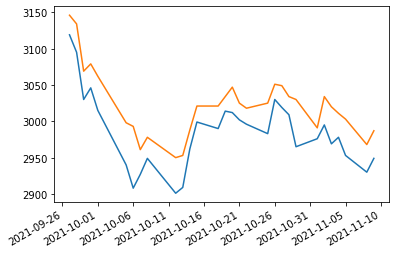

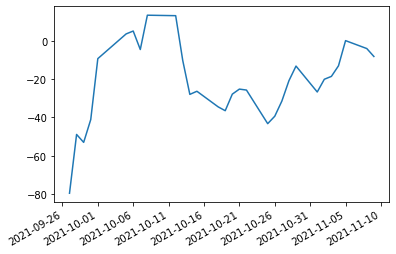

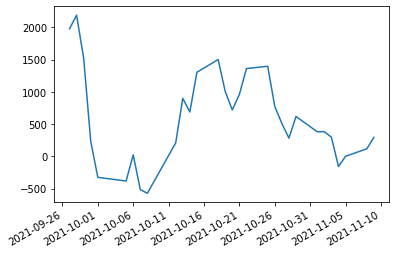

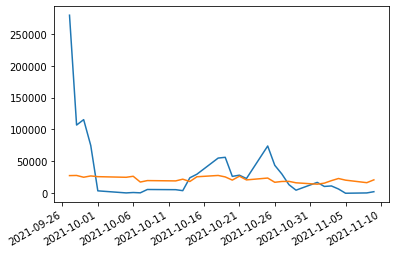

In [103]:
show([y1, y2], 'd')

show([y_v, ], 'v')

# show([y_a, ], 'a')

show([y_f, ], 'f')

show([y_kinetic, y_potential], 'energy')

In [8]:
import matplotlib.pyplot as  plt

In [ ]:
plt.plot()

In [3]:
api.get_sp500_histories(standard='H')

[{'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4682.88,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.0,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.2,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.19,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.16,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.81,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'maximum': 4708.53,
  'opening': 4707.25,
  'closing': 4683.83,
  'volume': 0.0},
 {'standard_date': '102800',
  'mininum': 4673.57,
  'max

In [16]:
product_code = '0001'
api.conn.GetSingleDataStockMaster(product_code, 1)

''

In [32]:
columns = [
    dict(index=0, key='standard_date', pk=True),
    dict(index=7, key='mininum', dtype=float),
    dict(index=6, key='maximum', dtype=float),
    dict(index=5, key='opening', dtype=float),
    dict(index=1, key='closing', dtype=float),
    dict(index=8, key='volume', dtype=float),
]

(
    api.set_data(0, 'N')  # 0: 시장 분류 코드, 'N': 기본
        .set_data(1, 'VIX')  # 1: 종목코드
        .set_data(2, '0')
        .request_data('PFX06910000')
        .get_data(multiple=True, columns=columns)
)

[]

In [4]:
(
    api.set_data(0, 'N')  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, 'NDAQ')  # 1: 종목코드
        .request_data('PFX06910000')
)

print([api.get_data(i) for i in range(10)])

['20211108', '211.69', '-1.14', '5', '-0.54', '214.10', '214.21', '209.54', '566061', '']


In [3]:
(
    api.set_data(block_index=0, field_index=0, value='U')
    .set_data(block_index=0, field_index=1, value='0001')
#     .set_data(block_index=1, field_index=2, value='20211109')
#     .set_data(block_index=1, field_index=3, value='D')
)

In [4]:
api.get_data(0)

''

004170: 신세계 주식 종목코드

In [3]:
product_code = '004170'
standard = 'D'

In [6]:
(
    api.set_data(0, 'J')  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, product_code)  # 1: 종목코드
        .set_data(2, standard)  # D: 일/ W: 주/ M: 월
        .request_data('SCPD')
)

columns = [
    dict(index=0, key='standard_date', pk=True),
    dict(index=3, key='mininum', dtype=int),
    dict(index=2, key='maximum', dtype=int),
    dict(index=1, key='opening', dtype=int),
    dict(index=4, key='closing', dtype=int),
    dict(index=5, key='volume', dtype=int),
]

data = api.get_data(multiple=True, columns=columns)

In [ ]:
(
    api.set_data(0, 'U')  # 0: 시장분류코드 / J: 주식, ETF, ETN
        .set_data(1, '0001')  # 1: 종목코드
        .set_data(2, '2021')  # D: 일/ W: 주/ M: 월
        .request_data('PUP02120000')
)

In [8]:
data

[{'standard_date': '20211109',
  'mininum': 237000,
  'maximum': 243000,
  'opening': 241000,
  'closing': 240000,
  'volume': 76758},
 {'standard_date': '20211108',
  'mininum': 234500,
  'maximum': 243000,
  'opening': 237000,
  'closing': 242000,
  'volume': 120074},
 {'standard_date': '20211105',
  'mininum': 230500,
  'maximum': 236500,
  'opening': 236000,
  'closing': 233500,
  'volume': 82318},
 {'standard_date': '20211104',
  'mininum': 234500,
  'maximum': 241500,
  'opening': 239000,
  'closing': 235500,
  'volume': 96364},
 {'standard_date': '20211103',
  'mininum': 236500,
  'maximum': 240000,
  'opening': 238500,
  'closing': 238000,
  'volume': 57152},
 {'standard_date': '20211102',
  'mininum': 236000,
  'maximum': 240500,
  'opening': 239000,
  'closing': 237500,
  'volume': 109132},
 {'standard_date': '20211101',
  'mininum': 235500,
  'maximum': 249000,
  'opening': 249000,
  'closing': 238000,
  'volume': 188691},
 {'standard_date': '20211029',
  'mininum': 247000,


In [5]:
api.get_data(7)

'240000'

In [17]:
api.get_data(4)

'76758'

In [4]:
product_code = '004170'

In [4]:
product_code = 'VOO'
market_code = 'AMEX'

In [21]:
api = load_api(market='overseas', account='5005775101', password='Dmazhffk1!!')

[INFO]2021-11-09 23:41:19 - pyefriend/api.py/__init__, 73: 계좌가 존재하는 지 확인합니다.: '5005775101'
[INFO]2021-11-09 23:41:19 - pyefriend/api.py/__init__, 79: 모의투자에 성공적으로 연결되었습니다. 타겟 계좌: '5005775101'


In [30]:
api.get_stock_histories('SPX', market_code='')

KeyError: 'no such code: '

In [6]:
api.set_auth(0).set_data(1, 'AMS').set_data(2, product_code).set_data(3, '0').request_data('OS_ST03')

In [7]:
columns = [
            dict(index=0, key='standard_date', pk=True),
            dict(index=7, key='mininum', dtype=float),
            dict(index=6, key='maximum', dtype=float),
            dict(index=5, key='opening', dtype=float),
            dict(index=1, key='closing', dtype=float),
            dict(index=8, key='volume', dtype=int),
        ]

# response
api.get_data(multiple=True, columns=columns, block_index=1)

[{'standard_date': '20211109',
  'mininum': 430.62,
  'maximum': 431.43,
  'opening': 431.22,
  'closing': 431.29,
  'volume': 6527},
 {'standard_date': '20211108',
  'mininum': 430.5,
  'maximum': 432.34,
  'opening': 431.88,
  'closing': 431.23,
  'volume': 3511610},
 {'standard_date': '20211105',
  'mininum': 429.3,
  'maximum': 432.76,
  'opening': 431.55,
  'closing': 430.71,
  'volume': 4942933},
 {'standard_date': '20211104',
  'mininum': 427.54,
  'maximum': 429.37,
  'opening': 427.85,
  'closing': 429.25,
  'volume': 4287284},
 {'standard_date': '20211103',
  'mininum': 423.69,
  'maximum': 427.66,
  'opening': 424.14,
  'closing': 427.25,
  'volume': 3562910},
 {'standard_date': '20211102',
  'mininum': 423.01,
  'maximum': 424.96,
  'opening': 423.15,
  'closing': 424.69,
  'volume': 2989214},
 {'standard_date': '20211101',
  'mininum': 421.28,
  'maximum': 423.57,
  'opening': 423.19,
  'closing': 423.05,
  'volume': 3937315},
 {'standard_date': '20211029',
  'mininum': 41